## Code to load an already existing model and train it on new data

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [102]:
# Load the existing model
model_save_path = "/content/keypoint_classifier.keras"
model_path = "/content/drive/My Drive/ISL_Models/keypoint_classifier_19th_Jan.h5"  # Update if the model path is different
tflite_save_path = '/content/keypoint_classifier.tflite'
model = load_model(model_path)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])# If loading a saved model for further training, ensure the optimizer is reset

In [103]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 40)                  │           3,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 40)                  │             160 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           1,066 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,626 (18.07 KB)

 Trainable params: 4,546 (17.76 KB)

 Non-trainable params: 80 (320.00 B)

## Data Preprocessing

In [104]:
# Load dataset
data_path = "/content/drive/My Drive/ISL_Datasets/rotated right-handed_landmarks (including E) 5th Feb.csv" #Path to standardized dataset
data = pd.read_csv(data_path) #To read a csv file as input

#data = pd.read_excel(data_path) #To read an excel sheet as input

val_save_path = f'/content/drive/My Drive/ISL_Datasets/rotated_right_handed_landmarks_25th_Feb(includes noise).csv'
val_data = pd.read_csv(val_save_path)

In [105]:
val_data.head()

,A,0.5448717948717948,0.1602564102564103,0.4134615384615384,-0.1153846153846154,0.4006410256410257,-0.4006410256410257,0.3814102564102564,-0.6025641025641025,0.3429487179487180,...,-0.4294871794871795,-0.4294871794871795.1,-0.6762820512820513,-0.6730769230769231,-0.4679487179487180,-0.5544871794871795,-0.4679487179487180.1,-0.4423076923076923,-0.5256410256410257,-0.4423076923076923.1
0,A,0.526814,0.227129,0.416404,-0.066246,0.432177,-0.353312,0.438486,-0.555205,0.410095,...,-0.365931,-0.473186,-0.580442,-0.731861,-0.388013,-0.596215,-0.400631,-0.485804,-0.457413,-0.492114
1,A,0.489097,0.271028,0.420561,-0.015576,0.467290,-0.292835,0.489097,-0.498442,0.476636,...,-0.314642,-0.495327,-0.504673,-0.772586,-0.317757,-0.616822,-0.348910,-0.507788,-0.408100,-0.517134
2,A,0.576860,0.102479,0.408264,-0.171901,0.361983,-0.469421,0.315702,-0.677686,0.249587,...,-0.494215,-0.419835,-0.771901,-0.631405,-0.547107,-0.538843,-0.537190,-0.419835,-0.600000,-0.413223
3,A,0.636042,-0.132509,0.353357,-0.351590,0.190813,-0.620141,0.074205,-0.814488,-0.053004,...,-0.639576,-0.242049,-1.000000,-0.355124,-0.727915,-0.330389,-0.667845,-0.224382,-0.717314,-0.203180
4,A,0.608319,-0.192374,0.313692,-0.369151,0.129983,-0.625650,-0.012132,-0.802426,-0.150780,...,-0.653380,-0.157712,-1.000000,-0.237435,-0.729636,-0.247834,-0.667244,-0.147314,-0.729636,-0.116118


In [106]:
# Separate features and labels (Assuming last column is the label)
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [107]:
print(X)

[[ 0.54589372  0.1610306   0.41384863 ... -0.44444444 -0.53623188
  -0.45088567]
 [ 0.52848101  0.22468354  0.41455696 ... -0.48734177 -0.46518987
  -0.5       ]
 [ 0.48598131  0.26635514  0.41744548 ... -0.50623053 -0.41433022
  -0.52180685]
 ...
 [ 0.34426229 -0.2         0.20218579 ... -0.27868853  0.13442623
  -0.3136612 ]
 [ 0.32655367 -0.26101695  0.17288136 ... -0.29717514  0.10734463
  -0.35141243]
 [ 0.37579618 -0.11677282  0.21443737 ... -0.26539278  0.19532909
  -0.2866242 ]]


In [108]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [109]:
len(X_train)

8108

In [110]:
# Custom converter function to convert characters to ASCII values
# retuns a list of encoded capital alphabets
def char_to_ascii(alphabets):
   return [(ord(char) - ord('A')) for char in alphabets]  # Convert character to ASCII value
    #if 0 <= ascii_val <= 25:  # Ensure ASCII value is within range
     #   return ascii_val
    #else:
     #   raise ValueError("Character '{}' is out of range (A-Z)".format(char))

In [111]:
#Storing training data and labels
X_train = np.array(X_train)
Y_train = np.array(y_train)

#Storing testing data and labels
X_test = np.array(X_test)
Y_test = np.array(y_test)

#Storing validation data and labels
X_val = np.array(val_data.iloc[:, 1:])
Y_val = np.array(val_data.iloc[:, 0])

In [112]:
# Converting the list returned by char_to_ascii to a numpy array
y_train = np.array(char_to_ascii(Y_train))
y_test = np.array(char_to_ascii(Y_test))
y_val = np.array(char_to_ascii(Y_val))

In [113]:
print("Target shape:", y_test.shape)  # Should be (None,) for sparse, (None, 26) for categorical
print("Model output shape:", model.output_shape)

Target shape: (901,)
Model output shape: (None, 26)


## Training the model

In [114]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)
#changed from 20 to 40 , change back late

In [ ]:

# Define ReduceLROnPlateau scheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Reduce LR when validation loss stops improving
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, min_lr=1e-6)

# Split dataset into training and validation sets (if not already split)
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with the scheduler
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=1000,  # Adjust based on your needs
    batch_size=64,
    callbacks=[cp_callback, es_callback]  # Include scheduler in callbacks
)


Epoch 1/1000
110/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9222 - loss: 0.6495
Epoch 1: saving model to /content/keypoint_classifier.keras
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9251 - loss: 0.6075 - val_accuracy: 0.9667 - val_loss: 0.1777
Epoch 2/1000
112/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9812 - loss: 0.0768
Epoch 2: saving model to /content/keypoint_classifier.keras
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9816 - loss: 0.0753 - val_accuracy: 0.9798 - val_loss: 0.1214
Epoch 3/1000
113/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9895 - loss: 0.0388
Epoch 3: saving model to /content/keypoint_classifier.keras
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9896 - loss: 0.0384 - val_accuracy: 0.9881 - val_loss: 0.0986
Epoch 4/1000
111/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9921 - loss: 0.0254
Epoch 4: saving model to /content/keypoint_classifier.keras
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.99

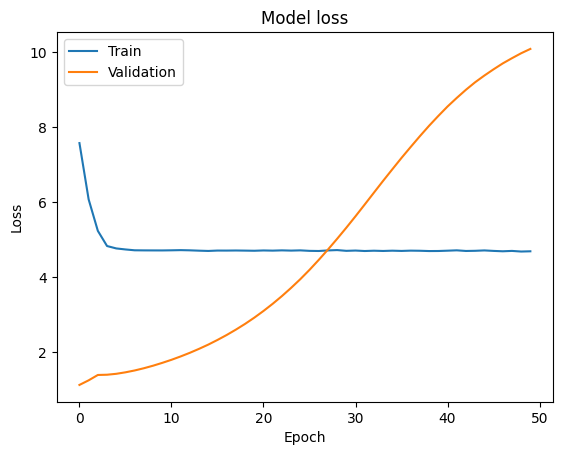

In [ ]:
#Printing the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Model evaluation

val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=64)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0000e+00 - loss: 4.9293


## Testing the model

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


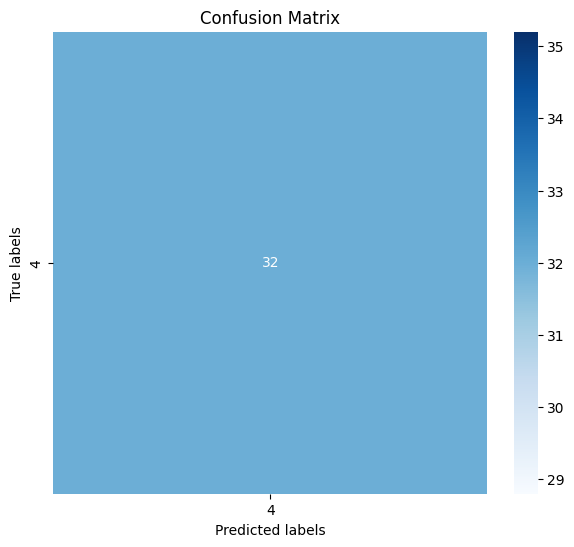

Classification Report
              precision    recall  f1-score   support

           4       1.00      0.67      0.80        48
           6       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         0

    accuracy                           0.67        48
   macro avg       0.20      0.13      0.16        48
weighted avg       1.00      0.67      0.80        48

True labels (characters):      ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E']
Predicted labels (characters): ['Q', 'E', 'E', 'E', 'E', 'E', 'E', 'V', 'E', 'E', 'E', 'G', 'W', 'E', 'V', 'E', 'E', 'E', 'E', 'Q', 'G', 'E', 'E', 'Q', 'E', 'V', 'Q', 'E', 'E', 'W', 'E', 'E', 'G', 'E', 'W', 'W', 'E', 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Load dataset
# Define the print_confusion_matrix function
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g', cmap='Blues', square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_true, y_pred))


predicted_probabilities = model.predict(X_test)
y_pred = np.argmax(predicted_probabilities, axis=1)

# Print confusion matrix and classification report
print_confusion_matrix(y_test, y_pred)

# Convert integer class labels to characters
y_test_chars = [chr(label + ord('A')) for label in y_test]
y_pred_chars = [chr(label + ord('A')) for label in y_pred]

print("True labels (characters):     ", y_test_chars)
print("Predicted labels (characters):", y_pred_chars)


In [ ]:
#Saving the model in .h5 format
hd5_save_path = "/content/drive/My Drive/ISL_Models/keypoint_classifier_rotated_left-handed_landmarks 22nd Jan.h5"
model.save(hd5_save_path)

In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

Saved artifact at '/tmp/tmp4vo0xjx4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 84), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  137655598680400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137655622716688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137655622716304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137655622715728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137655622715536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137655622715920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137655622717264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137655622719952: TensorSpec(shape=(), dtype=tf.resource, name=None)


7336